# Parallel Tour Construction for Ant Colony Optimisation


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ant-Colony-Optimisation" data-toc-modified-id="Ant-Colony-Optimisation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ant Colony Optimisation</a></span></li><li><span><a href="#Task" data-toc-modified-id="Task-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task</a></span></li><li><span><a href="#Package-Imports-&amp;-System-Info" data-toc-modified-id="Package-Imports-&amp;-System-Info-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Package Imports &amp; System Info</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Validation-Functions" data-toc-modified-id="Validation-Functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Validation Functions</a></span><ul class="toc-item"><li><span><a href="#Check-Tour-Function" data-toc-modified-id="Check-Tour-Function-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Check Tour Function</a></span></li><li><span><a href="#Check-Tours-Function" data-toc-modified-id="Check-Tours-Function-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Check Tours Function</a></span></li></ul></li><li><span><a href="#Independent-Roulette-Function" data-toc-modified-id="Independent-Roulette-Function-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Independent Roulette Function</a></span></li><li><span><a href="#Construct-Tour-Functions" data-toc-modified-id="Construct-Tour-Functions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Construct Tour Functions</a></span><ul class="toc-item"><li><span><a href="#Construct-Tour-Function" data-toc-modified-id="Construct-Tour-Function-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Construct Tour Function</a></span></li><li><span><a href="#NumPy-Construct-Tour-Function" data-toc-modified-id="NumPy-Construct-Tour-Function-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>NumPy Construct Tour Function</a></span></li></ul></li><li><span><a href="#Construct-Tours-Functions" data-toc-modified-id="Construct-Tours-Functions-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Construct Tours Functions</a></span><ul class="toc-item"><li><span><a href="#Construct-Tours-Function" data-toc-modified-id="Construct-Tours-Function-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Construct Tours Function</a></span></li><li><span><a href="#Construct-Tours-NumPy-Function" data-toc-modified-id="Construct-Tours-NumPy-Function-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Construct Tours NumPy Function</a></span></li><li><span><a href="#Construct-Tours-MultiProcessing-Function" data-toc-modified-id="Construct-Tours-MultiProcessing-Function-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>Construct Tours MultiProcessing Function</a></span></li></ul></li><li><span><a href="#Run-Experiments-Function" data-toc-modified-id="Run-Experiments-Function-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Run Experiments Function</a></span></li></ul></li><li><span><a href="#Results-Analysis" data-toc-modified-id="Results-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results Analysis</a></span><ul class="toc-item"><li><span><a href="#Analysis-Functions" data-toc-modified-id="Analysis-Functions-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Analysis Functions</a></span><ul class="toc-item"><li><span><a href="#Average-Times-for-Each-Method-Per-Cities" data-toc-modified-id="Average-Times-for-Each-Method-Per-Cities-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Average Times for Each Method Per Cities</a></span></li><li><span><a href="#Temperature-Change-of-The-Processor-During-Execution" data-toc-modified-id="Temperature-Change-of-The-Processor-During-Execution-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Temperature Change of The Processor During Execution</a></span></li></ul></li><li><span><a href="#Speedup,-Efficiency-and-Serial-Fraction" data-toc-modified-id="Speedup,-Efficiency-and-Serial-Fraction-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Speedup, Efficiency and Serial Fraction</a></span></li><li><span><a href="#Result-Description-and-Evaluation" data-toc-modified-id="Result-Description-and-Evaluation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Result Description and Evaluation</a></span></li></ul></li></ul></div>

## Ant Colony Optimisation
- Ant Colony Optimisation (ACO) is a well-established nature inspired technique for combinatorial optimisation. 
- It is most commonly used for the travelling salesman problem (TSP). 
    - In the TSP, the edges of a complete graph are allocated weights. For example, the Euclidean distance between cities on a map
        - The aim is to find the Hamiltonian circuit of the graph with minimum total weight 
            - e.g., the shortest tour which visits each city once, returning to the starting city at the end. 
    - In the ACO algorithm, agents (ants) construct tours of the graph guided by pheromone deposited by other ants. 
    - Ants deposit pheromone after completing a tour, with the amount of pheromone deposited depending on the quality of the tour.
         - In this way, ‘good’ edges are reinforcedand more likely to be selected by following ants.

## Task

    1. Develop a vectorized implementation of the tour construction function and obtain profiling data.
    
    2. Parallelize the construct tours method using multiprocessing.
    
    3. Analysis and evaluation of implementation and results.


## Package Imports & System Info
Below are the packages I have used to run the experiments along with the system the experiments run on

In [1]:
#--- Package Imports ---
import numpy as np
import random
import time
import multiprocessing as mp
import cpuinfo
import psutil
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
#--- System Info ---
print("System Processor: " + cpuinfo.get_cpu_info()['brand'])
print("Number of Cores: " + str(psutil.cpu_count(logical=False)))
print("Number of Threads: ", cpuinfo.get_cpu_info()['count'])

System Processor: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz
Number of Cores: 4
Number of Threads:  8


## Functions
This section contains all of the functions used to run the experiments 

### Validation Functions
Below are two functions to check the validity of the tour and the list of tours

#### Check Tour Function
- INPUTS: 
    - `tour` - list of `n` integers (0 to n-1 in some permutation)
    - `n` - number of cities
- OUTPUTS:
    - `True` - if tour is valid
    - `False` - if tour is invalid
- PROCESS:
    - checks a tour to see if its valid
         - i.e; correct length and no value above or below 0 to (n-1)

In [2]:
def check_tour(tour, n):
    m = len(tour)
    if m != n:
        return False
    counts = [0 for i in range(n)]
    for city in tour:
        if city < 0 or city > n - 1 or counts[city] != 0:
            return False
        counts[city] += 1
    return True

#### Check Tours Function
- INPUTS: 
    - `tours` - list of all tours (length = num_ants)
    - `n` - number of cities
- OUTPUTS:
    - `True` - if all tours are valid
    - `False` - if a tour is invalid
- PROCESS:
    - checks all tours to see if they're valid

In [3]:
def check_tours(tours, n):
    all_valid = True
    for t in tours:
        if not check_tour(t, n):
            all_valid = False
            break
    return all_valid

### Independent Roulette Function
This function is used to make a random choice
- INPUTS:
    - `weights` - an n x n dimensional array of random floats between 0 and 1, where n is number of cities
- OUTPUTS:
    - `imax` - the index of the highest value in weights
- PROCESS:
    - iroulette is used to make weighted random choices
    - each weight is multiplied by a uniformly distributed random number between 0 and 1
    - the city chosen is the one with the largest product of weight and random number

In [4]:
def iroulette(weights):
    num_weights = len(weights)
    imax = -1
    vmax = 0
    for i in range(num_weights):
        val = weights[i] * random.random()
        if val > vmax:
            vmax = val
            imax = i
    return imax

### Construct Tour Functions
These functions construct a tour in various ways

#### Construct Tour Function
- INPUTS:
    - `weights` - an n x n dimensional array of random floats between 0 and 1, where n is number of cities
- OUTPUTS:
    - `tour` - list of n integers (0 to n-1 in some permutation)
- PROCESS:
    - The ant is placed on a random starting city
    - At each city, the ant chooses its next city using a weighted random choice (`iroulette`) from all the cities not yet visited (the weights are taken from the `weights` matrix).
    - After making a choice, the new city is marked as visited and the process is repeated until all cities are visited.

In [5]:
def construct_tour(weights):
    n = weights[0].size
    cur_city = random.randrange(0, n)
    #add the current number to array
    tour = [cur_city]
    #create array of Trues, length n - to store which have been visited
    free = np.zeros(n) == 0.0
    #change the current cities true to false
    free[cur_city] = False
    #whilst the tour array isnt length n
    while len(tour) < n:
        #create list to add the weights of unvisited cities
        w = []
        #create list to add the index of unvisited cities
        indices = []
        for i in range(n):
            if free[i]:
                #add its weight to the weight list
                w.append(weights[cur_city][i])
                #add the index of the weight to index list
                indices.append(i)
        # select weight by using iroulette function
        # on the list of unvisted weights
        # returns index of highest product of weight and rand num
        sel = iroulette(w)
        #change current city to the index of the selected weight
        cur_city = indices[sel]
        tour.append(cur_city)
        free[cur_city] = False
    return tour

#### NumPy Construct Tour Function
- INPUTS:
    - `weights` - an n x n dimensional array of random floats between 0 and 1, where n is number of cities
- OUTPUTS:
    - `tour` - list of n integers (0 to n-1 in some permutation)
- PROCESS:
    - The ant is placed on a random starting city
    - At each city, the ant chooses its next city using a weighted random choice (`indices[np.argmax(weights[cur_city][free] * random.random())]`) from all the cities not yet visited (the weights are taken from the `weights` matrix).
    - After making a choice, the new city is marked as visited and the process is repeated until all cities are visited.

In [6]:
def np_construct_tour(weights):
    #store num of cities in var
    n = weights[0].size
    #begin by starting on a random number between 0 - n
    cur_city = random.randrange(0, n)
    #add the current number to array
    tour = [cur_city]
    #create array of Trues, length n - to store which have been visited
    free = np.zeros(n) == 0.0
    #change the current cities true to false
    free[cur_city] = False
    #whilst the tour array isnt length n
    while len(tour) < n:
        #
        indices = np.where(free)[0]
        #
        cur_city = indices[np.argmax(weights[cur_city][free] * random.random())]
        #add current city to tour list
        tour.append(cur_city)
        #change the current city to false in visted array
        free[cur_city] = False
    return tour

In [7]:
def np_construct_tour_queue(weights, out_q):
    #store num of cities in var
    n = weights[0].size
    #begin by starting on a random number between 0 - n
    cur_city = random.randrange(0, n)
    #add the current number to array
    tour = [cur_city]
    #create array of Trues, length n - to store which have been visited
    free = np.zeros(n) == 0.0
    #change the current cities true to false
    free[cur_city] = False
    #whilst the tour array isnt length n
    while len(tour) < n:
        #
        w = weights[cur_city][free]
        #
        indices = np.where(free)[0]
        #
        cur_city = indices[np.argmax(w * random.random())]
        #add current city to tour list
        tour.append(cur_city)
        #change the current city to false in visted array
        free[cur_city] = False
    #return tour
    out_q.put(tour)

### Construct Tours Functions
These functions call the various construct tour functions to produce the tours list using various ways

#### Construct Tours Function
- INPUTS:
    - `weights` - an n x n dimensional array of random floats between 0 and 1, where n is number of cities
     - `num_ants` - number of ants or agents
- OUTPUTS:
    - `tours` - list of `tour`'s, length - `num_ants` 
        - each `tour` length n
- PROCESS:
    - calls the construct tour function for each ant and adds it to the tour list

In [12]:
def construct_tours(weights, num_ants):
    #init tours array
    tours = []
    #for each ant
    for i in range(num_ants):
        #create a tour using weights matrix and add it to the list of tours
        tours.append(construct_tour(weights))
    #return the list of tours
    return tours

#### Construct Tours NumPy Function
- INPUTS:
    - `weights` - an n x n dimensional array of random floats between 0 and 1, where n is number of cities.
     - `num_ants` - number of ants or agents.
- OUTPUTS:
    - `tours` - list of `tour`'s, length - `num_ants`. 
        - each `tour` length n.
- PROCESS:
    - calls the  NumPy construct tour function for each ant and adds it to the tour list.

In [13]:
def construct_tours_np(weights, num_ants):
    #
    tours = []
    for i in range(num_ants):
        tours.append(np_construct_tour(weights))
    return tours

#### Construct Tours MultiProcessing Function
- INPUTS:
    - `weights` - an n x n dimensional array of random floats between 0 and 1, where n is number of cities.
     - `num_ants` - number of ants or agents.
- OUTPUTS:
    - `tours` - a list of `tour`'s, length - `num_ants`.
        - each `tour` length n.
- PROCESS:
    - the process of creating `tours` is split and run in paralell 

In [15]:
#----------------POOL------------
def construct_tours_mp_pool(weights, num_ants):
    num_procs = num_ants
    pool = mp.Pool(processes=num_procs)
    return pool.map(np_construct_tour, [weights for i in range(num_ants)])

In [16]:
def construct_tours_mp_queue(weights, num_ants):
    out_queue = mp.Queue()
    procs = [
        mp.Process(target=np_construct_tour_queue, args=(weights, out_queue))
        for p in range(num_ants)
    ]

    for p in procs:
        p.start()

    return [out_queue.get() for p in procs]

In [17]:
check_tours(construct_tours_mp_queue(np.random.random((2000, 2000)), 1), 2000)

True

In [18]:
check_tours(construct_tours_mp_pool(np.random.random((8000, 8000)), 8), 8000)

True

Process ForkPoolWorker-329:
Process ForkPoolWorker-331:
Process ForkPoolWorker-325:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-332:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkPoolWorker-326:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (mos

### Run Experiments Function
This function runs the experiments and records the results in a csv file
- INPUTS:
    - `ants` - an n x n dimensional array of random floats between 0 and 1, where n is number of cities
     - `method` - number of ants or agents
- OUTPUTS:
    - results
- PROCESS:
    - 

In [12]:
def run_experiments(ants, method):
    with open('results.csv', 'a') as csvFile:
        citytests = [1000, 2000, 4000, 8000]
        for x in citytests:
            for i in range(10):
                #number of cities in the problem
                n = x
                #square matrix of random weights for edges
                weights = np.random.random((n, n))
                #number of ants or agents
                num_ants = ants
                #
                bcore0, bcore1, bcore2, bcore3 = psutil.sensors_temperatures(
                )['coretemp'][1:5]

                t = time.perf_counter()

                if method == "Serial":
                    tours = construct_tours(weights, num_ants)
                elif method == "Vectorise":
                    tours = construct_tours_np(weights, num_ants)
                elif method == "Parallelise_Pool":
                    tours = construct_tours_mp_pool(weights, num_ants)
                elif method == "Parallelise_Queue":
                    tours = construct_tours_mp_queue(weights, num_ants)

                acore0, acore1, acore2, acore3 = psutil.sensors_temperatures(
                )['coretemp'][1:5]
                t = time.perf_counter() - t

                valid = check_tours(tours, n)
                tcore0 = int(acore0.current) - int(bcore0.current)
                tcore1 = int(acore1.current) - int(bcore1.current)
                tcore2 = int(acore2.current) - int(bcore2.current)
                tcore3 = int(acore3.current) - int(bcore3.current)

                row = [method, n, t, tcore0, tcore1, tcore2, tcore3]
                writer = csv.writer(csvFile)
                writer.writerow(row)

                print('-' * 10, 'Experiment', '-' * 10)
                print("constructed", len(tours), "tours with", n, 'cities')
                print("valid tours:", valid)
                print(method, "time for", num_ants, "ants is", t)
                print(bcore0.label, "Temp Change: ", tcore0, "°C")
                print(bcore1.label, "Temp Change: ", tcore1, "°C")
                print(bcore2.label, "Temp Change: ", tcore2, "°C")
                print(bcore3.label, "Temp Change: ", tcore3, "°C")
                print('-' * 30)
                time.sleep(30)
    csvFile.close()

In [19]:
def main():
    method = ['Parallelise_Pool']
    ants = 8
    for x in method:
        run_experiments(ants, x)

In [20]:
if __name__ == '__main__':
    main()

---------- Experiment ----------
constructed 8 tours with 1000 cities
valid tours: True
Parallelise_Pool time for 8 ants is 0.16946770799995647
Core 0 Temp Change:  0 °C
Core 1 Temp Change:  0 °C
Core 2 Temp Change:  0 °C
Core 3 Temp Change:  0 °C
------------------------------
---------- Experiment ----------
constructed 8 tours with 1000 cities
valid tours: True
Parallelise_Pool time for 8 ants is 0.14933179499985272
Core 0 Temp Change:  0 °C
Core 1 Temp Change:  0 °C
Core 2 Temp Change:  0 °C
Core 3 Temp Change:  0 °C
------------------------------
---------- Experiment ----------
constructed 8 tours with 1000 cities
valid tours: True
Parallelise_Pool time for 8 ants is 0.14228877599998668
Core 0 Temp Change:  0 °C
Core 1 Temp Change:  0 °C
Core 2 Temp Change:  0 °C
Core 3 Temp Change:  0 °C
------------------------------
---------- Experiment ----------
constructed 8 tours with 1000 cities
valid tours: True
Parallelise_Pool time for 8 ants is 0.14394346599965502
Core 0 Temp Change:

---------- Experiment ----------
constructed 8 tours with 8000 cities
valid tours: True
Parallelise_Pool time for 8 ants is 6.7212073269997745
Core 0 Temp Change:  -6 °C
Core 1 Temp Change:  4 °C
Core 2 Temp Change:  12 °C
Core 3 Temp Change:  7 °C
------------------------------
---------- Experiment ----------
constructed 8 tours with 8000 cities
valid tours: True
Parallelise_Pool time for 8 ants is 6.729937136999979
Core 0 Temp Change:  3 °C
Core 1 Temp Change:  2 °C
Core 2 Temp Change:  5 °C
Core 3 Temp Change:  4 °C
------------------------------
---------- Experiment ----------
constructed 8 tours with 8000 cities
valid tours: True
Parallelise_Pool time for 8 ants is 7.311702154000159
Core 0 Temp Change:  -6 °C
Core 1 Temp Change:  5 °C
Core 2 Temp Change:  12 °C
Core 3 Temp Change:  6 °C
------------------------------
---------- Experiment ----------
constructed 8 tours with 8000 cities
valid tours: True
Parallelise_Pool time for 8 ants is 7.1942968769999425
Core 0 Temp Change:  

Process ForkPoolWorker-514:
Process ForkPoolWorker-569:
Process ForkPoolWorker-453:
Process ForkPoolWorker-539:
Process ForkPoolWorker-418:
Process ForkPoolWorker-383:
Process ForkPoolWorker-551:
Process ForkPoolWorker-455:


KeyboardInterrupt: 

Process ForkPoolWorker-454:
Process ForkPoolWorker-375:
Process ForkPoolWorker-376:
Process ForkPoolWorker-461:
Process ForkPoolWorker-377:
Process ForkPoolWorker-552:
Process ForkPoolWorker-561:
Process ForkPoolWorker-350:
Process ForkPoolWorker-452:
Process ForkPoolWorker-406:
Process ForkPoolWorker-365:
Process ForkPoolWorker-362:
Process ForkPoolWorker-490:
Process ForkPoolWorker-602:
Process ForkPoolWorker-448:
Process ForkPoolWorker-528:
Process ForkPoolWorker-405:
Process ForkPoolWorker-576:
Process ForkPoolWorker-434:
Process ForkPoolWorker-572:
Process ForkPoolWorker-523:
Process ForkPoolWorker-527:
Process ForkPoolWorker-603:
Process ForkPoolWorker-442:
Process ForkPoolWorker-573:
Process ForkPoolWorker-621:
Process ForkPoolWorker-440:
Process ForkPoolWorker-530:
Process ForkPoolWorker-426:
Process ForkPoolWorker-451:
Process ForkPoolWorker-336:
Process ForkPoolWorker-449:
Process ForkPoolWorker-373:
Process ForkPoolWorker-501:
Process ForkPoolWorker-431:
Process ForkPoolWork

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstra

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
Process ForkPoolWorker-482:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/dann

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anacond

Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/danny/anaconda3/lib/python3.7/m

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 35

KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Process ForkPoolWorker-386:
Process ForkPoolWorker-593:
Process ForkPoolWorker-488:
Process ForkPoolWorker-610:
Process ForkPoolWorker-408:
Process ForkPoolWorker-424:
Process ForkPoolWorker-512:
Process ForkPoolWorker-459:
Process ForkPoolWorker-524:
Process ForkPoolWorker-516:
Process ForkPoolWorker-513:
Process ForkPoolWorker-566:
Process ForkPoolWorker-391:
Process ForkPoolWorker-533:
Process ForkPoolWorker-511:
Process ForkPoolWorker-382:
Process ForkPoolWorker-364:
Process ForkPoolWorker-483:
Process ForkPoolWorker-396:
Process ForkPoolWorker-604:
Process ForkPoolWorker-503:
Process ForkPoolWorker-411:
Process ForkPoolWorker-521:
Process ForkPoolWorker-354:
Process ForkPoolWorker-446:
Process ForkPoolWorker-341:
Process ForkPoolWorker-618:
Traceback (most recent call last):
Traceback (most recent call last):
Pr

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessin

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in w

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in g

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
Traceback (most recent call last):
Traceback (most recent call last):
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.

  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", lin

Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/danny/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, i

## Results Analysis
Below is an analysis on the results of the experiments

In [ ]:
data = pd.read_csv(
    "results.csv",
    names=['Method', 'Cities', 'Time', 'Core 0', 'Core 1', 'Core 2', 'Core 3'])

### Analysis Functions

In [ ]:
def showAvg(method):
    print('-' * 10, method, 'Times', '-' * 10)
    print(
        "The average time for 1000 Cities is :",
        data[(data['Method'] == method)
             & (data['Cities'] == 1000)]['Time'].mean())
    print(
        "The average time for 2000 Cities is :",
        data[(data['Method'] == method)
             & (data['Cities'] == 2000)]['Time'].mean())
    print(
        "The average time for 4000 Cities is :",
        data[(data['Method'] == method)
             & (data['Cities'] == 4000)]['Time'].mean())
    print(
        "The average time for 8000 Cities is :",
        data[(data['Method'] == method)
             & (data['Cities'] == 8000)]['Time'].mean())

In [ ]:
def coreTemp(Method, Cities):
    ds = data[(data['Method'] == Method) & (data['Cities'] == Cities)]
    avg = (ds['Core 0'].mean() + ds['Core 1'].mean() + ds['Core 2'].mean() +
           ds['Core 3'].mean()) / 4
    return avg

In [ ]:
def plotTemp(cities):
    temp = [coreTemp('Serial', cities), coreTemp('Vectorise', cities), coreTemp('Parallelise_Pool', cities), coreTemp('Parallelise_Queue', cities)]
    meth= ['Serial', 'Vectorise', 'Parallelise_Pool', 'Parallelise_Queue']
    ax = sns.barplot(x=meth, y=temp)
    ax.set(ylabel='Avg Change in Temp °C')
    ax.set_title('Change in Processor Temperature when Executing ' + str(cities) + " Cities for Each Method")
    plt.show()

#### Average Times for Each Method Per Cities

In [ ]:
showAvg("Serial")

In [39]:
showAvg("Vectorise")

---------- Vectorise Times ----------
The average time for 1000 Cities is : 0.07905624379982328
The average time for 2000 Cities is : 0.25825691460013334
The average time for 4000 Cities is : 0.9684988918999806
The average time for 8000 Cities is : 3.739886908399785


In [40]:
showAvg("Parallelise_Pool")

---------- Parallelise Times ----------
The average time for 1000 Cities is : 0.26774529960002835
The average time for 2000 Cities is : 0.7215621330997237
The average time for 4000 Cities is : 2.55676918570025
The average time for 8000 Cities is : 6.5473945137000555


In [ ]:
showAvg("Parallelise_Queue")

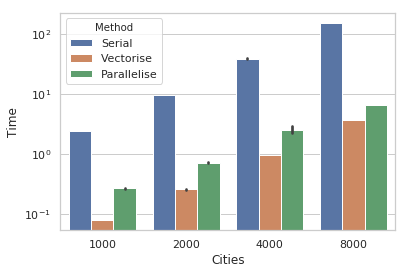

In [41]:
ax = sns.barplot(x="Cities", y="Time", hue="Method", data=data)
ax.set_yscale('log')

####  Temperature Change of The Processor During Execution

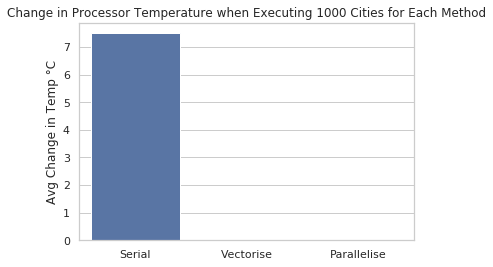

In [68]:
plotTemp(1000)

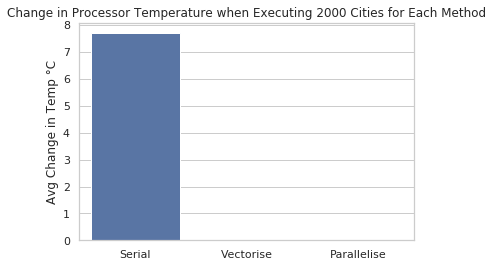

In [87]:
plotTemp(2000)

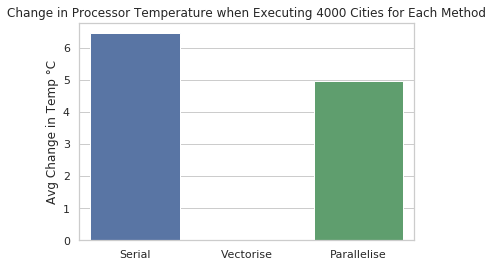

In [88]:
plotTemp(4000)

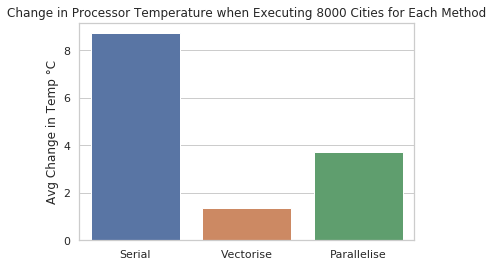

In [89]:
plotTemp(8000)

### Speedup, Efficiency and Serial Fraction

In [50]:
def calcs(meth):
    process_counts = [1000, 2000, 4000, 8000]
    if meth == "Vectorise":
        execution_times = [
            data[(data['Method'] == "Vectorise")
                 & (data['Cities'] == 1000)]['Time'].mean(),
            data[(data['Method'] == "Vectorise")
                 & (data['Cities'] == 2000)]['Time'].mean(),
            data[(data['Method'] == "Vectorise")
                 & (data['Cities'] == 4000)]['Time'].mean(),
            data[(data['Method'] == "Vectorise")
                 & (data['Cities'] == 8000)]['Time'].mean()
        ]
    elif meth == "Parallelise_Pool":
        execution_times = [
            data[(data['Method'] == "Parallelise_Pool")
                 & (data['Cities'] == 1000)]['Time'].mean(),
            data[(data['Method'] == "Parallelise_Pool")
                 & (data['Cities'] == 2000)]['Time'].mean(),
            data[(data['Method'] == "Parallelise_Pool")
                 & (data['Cities'] == 4000)]['Time'].mean(),
            data[(data['Method'] == "Parallelise_Pool")
                 & (data['Cities'] == 8000)]['Time'].mean()
        ]
    elif meth == "Parallelise_Queue":
        execution_times = [
            data[(data['Method'] == "Parallelise_Queue")
                 & (data['Cities'] == 1000)]['Time'].mean(),
            data[(data['Method'] == "Parallelise_Queue")
                 & (data['Cities'] == 2000)]['Time'].mean(),
            data[(data['Method'] == "Parallelise_Queue")
                 & (data['Cities'] == 4000)]['Time'].mean(),
            data[(data['Method'] == "Parallelise_Queue")
                 & (data['Cities'] == 8000)]['Time'].mean()
        ]
    tsd = [
        data[(data['Method'] == "Serial")
             & (data['Cities'] == 1000)]['Time'].mean(),
        data[(data['Method'] == "Serial")
             & (data['Cities'] == 2000)]['Time'].mean(),
        data[(data['Method'] == "Serial")
             & (data['Cities'] == 4000)]['Time'].mean(),
        data[(data['Method'] == "Serial")
             & (data['Cities'] == 8000)]['Time'].mean()
    ]
    speedup = []
    efficiency = []
    edsf = []
    for i in range(len(process_counts)):
        ts = tsd[i]
        tp = execution_times[i]
        p = process_counts[i]
        s = ts / tp
        e = s / p
        speedup.append(s)
        efficiency.append(e)
        if i == 0:
            edsf.append(0.0)
        else:
            edsf.append(1.0 / (p - 1.0) * (p / s - 1.0))

    plt.plot(process_counts, speedup)
    plt.scatter(process_counts, speedup)
    plt.xlabel('Number of Cities')
    plt.ylabel('Speedup')
    plt.show()

    plt.plot(process_counts, efficiency)
    plt.scatter(process_counts, efficiency)
    plt.xlabel('Number of Cities')
    plt.ylabel('Efficiency')
    plt.show()

    plt.plot(process_counts, edsf)
    plt.scatter(process_counts, edsf)
    plt.xlabel('Number of Cities')
    plt.ylabel('Serial Fraction')
    plt.show()

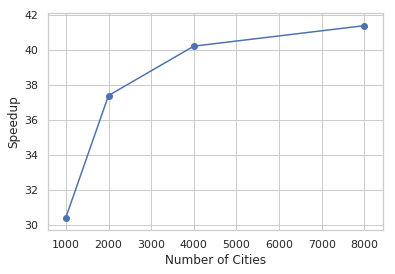

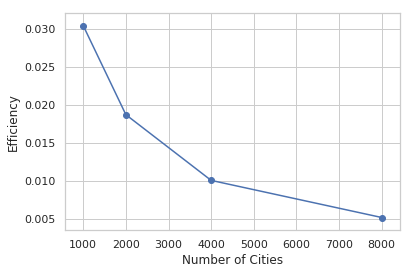

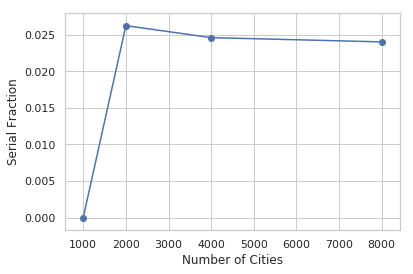

In [48]:
calcs('Vectorise')

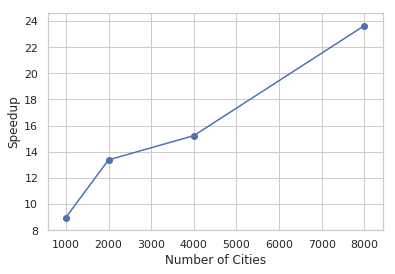

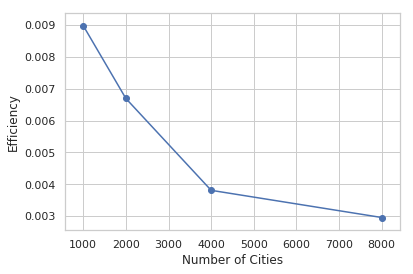

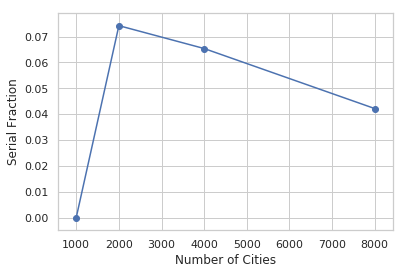

In [49]:
calcs("Parallelise")

### Result Description and Evaluation


# References